In [1]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
filename = "ddf_ocean_ocean1_v4.3.4_10yrs.db"
run_name = filename.replace('.db', '')
con = sqlite3.connect(filename)
df = pd.read_sql("select * from observations;", con)
con.close()

In [3]:
def count_value_changes(inarr):
    return np.sum(inarr[1:].values != inarr[:-1].values)


In [4]:
fc_pn = df.groupby("night")["filter"].apply(count_value_changes)

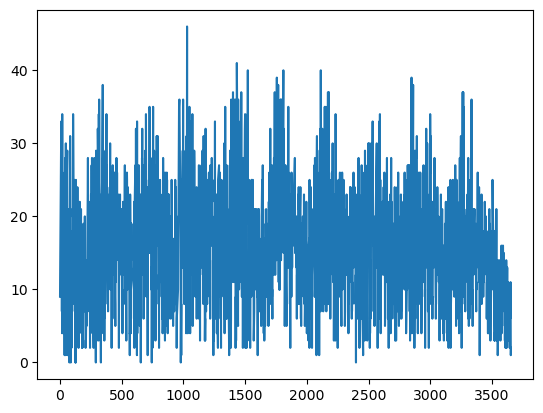

In [5]:
plt.plot(fc_pn.index, fc_pn)

In [6]:
indx = ['DD' in note for note in df["scheduler_note"]]

In [7]:
np.sum(indx)

np.int64(282585)

In [9]:
ack = df["scheduler_note"].values[indx]
ack.size

282585

In [10]:
np.size(np.unique(ack))

174872

In [16]:
fc_pn.index[np.where(fc_pn > 40)]

Index([], dtype='int64', name='night')

In [17]:
indx = np.where(df["night"] == 18)[0]

In [18]:
df["scheduler_note"].iloc[indx]

4778    pair_15, iz, a
4779    pair_15, iz, a
4780    pair_15, iz, a
4781    pair_15, iz, a
4782    pair_15, iz, a
             ...      
5390    pair_15, ri, b
5391    pair_15, ri, b
5392    pair_15, ri, b
5393    pair_15, ri, b
5394    pair_15, ri, b
Name: scheduler_note, Length: 617, dtype: object

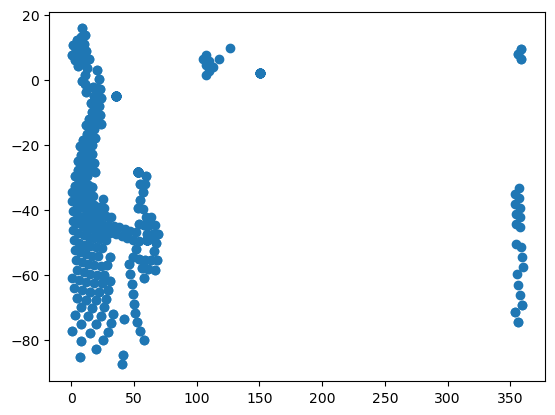

In [19]:
plt.scatter(df["fieldRA"].iloc[indx], df["fieldDec"].iloc[indx])

In [20]:
for ind in indx:
    print(df["filter"].iloc[ind], df["scheduler_note"].iloc[ind])



i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z DD:ELAISS1, 1239
z DD:ELAISS1, 1240
u DD:XMM_LSS, 1245
u DD:XMM_LSS, 1246
u DD:XMM_LSS, 1247
u DD:XMM_LSS, 1248
u DD:XMM_LSS, 1249
u DD:XMM_LSS, 125

In [21]:
visits_array = df.to_records()

In [22]:
ack = np.where((visits_array["filter"]=="r") & (visits_array["target_name"] == "DD:COSMOS"))[0]

In [23]:
visits_array.shape

(1978247,)

In [24]:
def coadd(mags):
    return 1.25 * np.log10(np.sum(10.0 ** (0.8 * mags)))

In [25]:
df.iloc[ack]

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,band,filter,rotSkyPos,rotSkyPos_desired,...,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,observation_reason,science_program,cloud_extinction
4033,4033,150.001031,2.273419,60994.313271,60995.345833,29.2,r,r,152.113333,152.113333,...,-18.475302,178.980641,0.021288,29.059200,81.656626,29.871462,83.639907,FBS,DD,0.0
4425,4425,150.072149,2.220700,60996.301606,60996.345833,29.2,r,r,136.253318,136.253318,...,-18.972067,200.374181,-11.053250,51.757456,83.549017,17.746042,73.981241,FBS,DD,0.0
4451,4451,150.072149,2.220700,60996.320496,60997.335416,29.2,r,r,134.325318,134.325318,...,-18.976681,200.601883,-11.169387,51.999905,83.567808,17.618530,73.981241,FBS,DD,0.0
5153,5153,150.198795,2.063207,60998.308388,60998.335416,29.2,r,r,93.845047,93.845047,...,-19.450865,223.156016,-20.329924,74.802774,85.373966,5.974735,83.264577,FBS,DD,0.0
5179,5179,150.198795,2.063207,60998.327280,60999.335416,29.2,r,r,91.599187,91.599187,...,-19.455262,223.431534,-20.431012,75.072637,85.392772,5.844385,83.264577,FBS,DD,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897322,1897322,150.087787,2.135835,64475.975127,64477.970832,29.2,r,r,35.264065,35.264065,...,21.470994,323.772513,-12.220027,168.132226,84.506757,58.271018,-21.251147,FBS,DD,0.0
1898358,1898358,150.116377,2.079612,64476.976052,64478.970832,29.2,r,r,27.333828,27.333828,...,21.628364,335.890722,-8.995358,171.010083,83.606811,51.978331,-13.914054,FBS,DD,0.0
1900443,1900443,150.198722,2.115947,64478.987247,64480.970832,29.2,r,r,5.790950,5.790950,...,21.925610,0.622765,-1.113519,149.572204,81.767591,38.747669,-12.800318,FBS,DD,0.0
1900879,1900879,150.049561,2.158020,64482.977715,64484.970832,29.2,r,r,36.500085,36.500085,...,22.438991,55.186069,15.115909,94.127203,77.842568,9.875077,-27.829876,FBS,DD,0.0


In [27]:
daily_coadd = df.iloc[ack].groupby("night")["fiveSigmaDepth"].apply(coadd)

Text(0.5, 1.0, 'initial_ddf_ocean_ocean1_v4.3.4_10yrs')

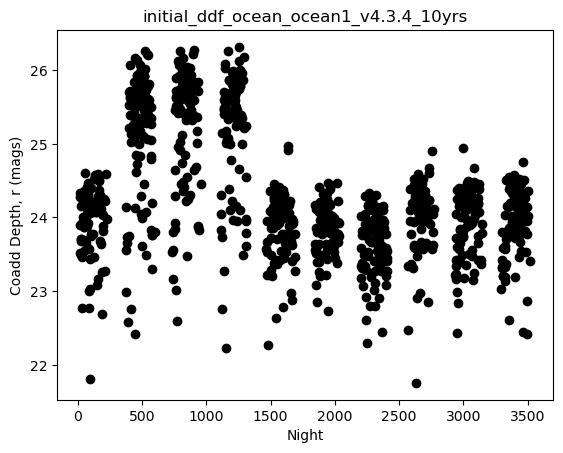

In [33]:
fig, ax = plt.subplots()
ax.plot(daily_coadd.index, daily_coadd, 'ko')
ax.set_xlabel('Night')
ax.set_ylabel('Coadd Depth, r (mags)')
ax.set_title(run_name)

In [35]:
indx = np.where((daily_coadd.index > 400) & (daily_coadd.index < 1200))[0]

In [37]:
np.median(daily_coadd.iloc[indx].values)

np.float64(25.50644018418894)